In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [9]:
train = pd.read_csv("C:/Users/dell/Desktop/Datasets/walmart/train.csv")
test = pd.read_csv("C:/Users/dell/Desktop/Datasets/walmart/test.csv")
features = pd.read_csv("C:/Users/dell/Desktop/Datasets/walmart/features.csv")
stores = pd.read_csv("C:/Users/dell/Desktop/Datasets/walmart/stores.csv")

In [10]:
writer = pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx', engine='xlsxwriter')

In [13]:
train_init = pd.merge(train, stores)
train = pd.merge(train_init, features)
test_init = pd.merge(test, stores)
test = pd.merge(test_init, features)

In [14]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [15]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [16]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [17]:
from statistics import mean

train['MarkDown1'] = train['MarkDown1'].fillna(0)
train['MarkDown2'] = train['MarkDown2'].fillna(0)
train['MarkDown3'] = train['MarkDown3'].fillna(0)
train['MarkDown4'] = train['MarkDown4'].fillna(0)
train['MarkDown5'] = train['MarkDown5'].fillna(0)

In [18]:
train = train.sort_values(by = 'Date')

In [19]:
train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [31]:
unique_val = train["Type"].nunique()
print(unique_val)

3


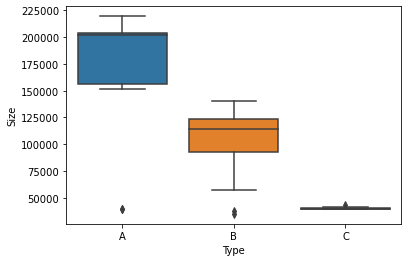

In [33]:
store_type = pd.concat([stores["Type"], stores["Size"]], axis = 1)
fig = sns.boxplot(x = 'Type', y = "Size", data = store_type)

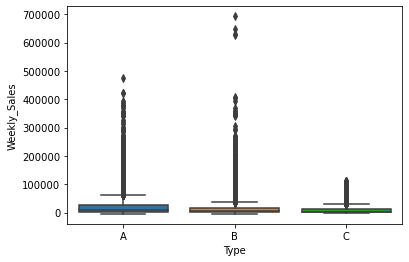

In [41]:
store_sale = pd.concat([train["Type"], train["Weekly_Sales"]], axis = 1)
fig = sns.boxplot(x = "Type", y = "Weekly_Sales", data = store_sale)

In [44]:
print('sales on non-holiday : ',train[train['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',train[train['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  391909
sales on holiday :  29661


[]

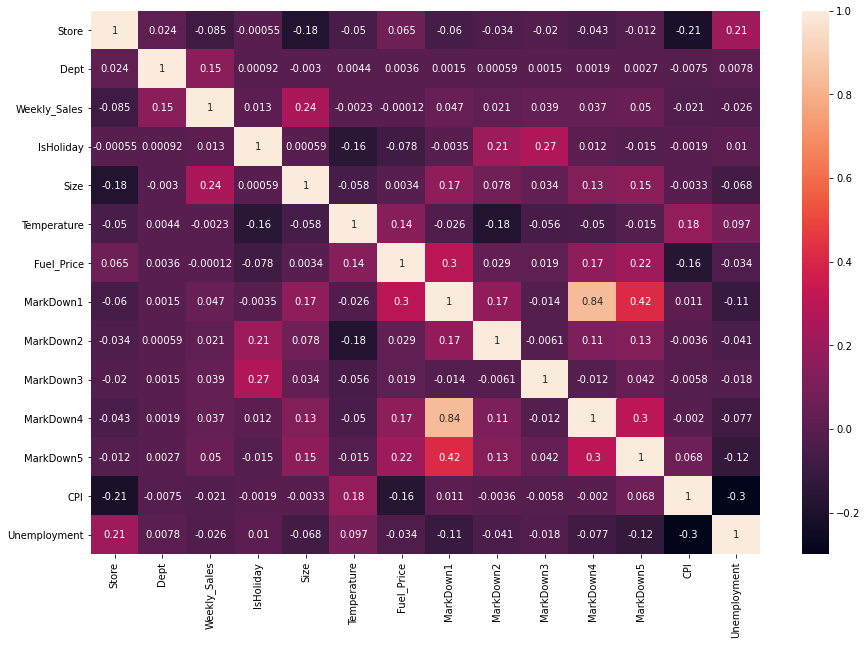

In [46]:
corr = train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [48]:
train["Year"] = pd.to_datetime(train["Date"], format="%Y-%m-%d").dt.year
test["Year"] = pd.to_datetime(test["Date"], format="%Y-%m-%d").dt.year
# Add column for day
train["Day"] = pd.to_datetime(train["Date"], format="%Y-%m-%d").dt.day
test["Day"] = pd.to_datetime(test["Date"], format="%Y-%m-%d").dt.day
# Add column for days to next Christmas
train["Days to Next Christmas"] = (pd.to_datetime(train["Year"].astype(str)+"-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(train["Date"], format="%Y-%m-%d")).dt.days.astype(int)
test["Days to Next Christmas"] = (pd.to_datetime(test["Year"].astype(str) + "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(test["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [54]:
test["Year"].head()

0    2012
1    2012
2    2012
3    2012
4    2012
Name: Year, dtype: int64

In [57]:
train["Year"].head()

0         2010
330761    2010
330762    2010
330763    2010
330764    2010
Name: Year, dtype: int64

In [58]:
train["Day"].head()

0         5
330761    5
330762    5
330763    5
330764    5
Name: Day, dtype: int64

In [59]:
train["Days to Next Christmas"].head()

0         329
330761    329
330762    329
330763    329
330764    329
Name: Days to Next Christmas, dtype: int32

In [64]:
from sklearn.model_selection import train_test_split

In [72]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Day,Days to Next Christmas
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5,329
330761,35,3,2010-02-05,14612.19,False,B,103681,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,2010,5,329
330762,35,4,2010-02-05,26323.15,False,B,103681,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,2010,5,329
330763,35,5,2010-02-05,36414.63,False,B,103681,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,2010,5,329
330764,35,6,2010-02-05,11437.81,False,B,103681,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,2010,5,329


In [77]:
Test = train["Weekly_Sales"]
Train = train.drop(["IsHoliday", "Type", "Date"], axis = 1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split( Train, Test, test_size=0.20, random_state=0)

In [79]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

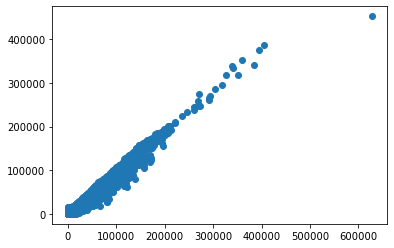

In [81]:
plt.scatter(y_test, y_pred)
plt.show()

In [110]:
#since the plot is almost linear, the predicted values can be efficiently calculated by the help of Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression

L_reg = LinearRegression()
L_reg.fit(X_train, y_train)
L_reg.predict(X_test)
L_reg.score(X_test, y_test) * 100

100.0

In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [91]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
accuracy = knn.score(X_test, y_test)

2959.480268686102
18472433.94681091
4297.956950320804


In [113]:
knn.score(X_test, y_test) * 100

96.44824494314184

In [93]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [114]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
dt.score(X_test, y_test) * 100

2.729338544014055
62812.17683049661
250.62357596701992


99.98792289812309

In [115]:
from sklearn import ensemble

In [116]:
reg = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, learning_rate = 0.1, loss = 'ls', min_samples_split = 2)

In [118]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [119]:
reg.score(X_test, y_test) * 100

99.99904545229515